## 부동산 매각금액 분석

1. 매각금액이 가장 많은 팀을 구하고, 하위 그룹과 유의한 차이를 보이는지 확인한다.
1. 연도별 매각금액 추이를 확인한다.
1. 상위 5개 지역별 매각면적을 확인한다.
1. 계약일자 정보를 토대로 매각이 많은 때의 특징을 알아본다.

#### 선택분석
1. 처분 구분별 비율을 확인한다.
1. 필수 -2 항목을 증감액 그래프로 표현한다.
1. 필수 -3 항목을 지역 크기에 따라 보정한다.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import ks_2samp
from statannot import add_stat_annotation
sns.set(font_scale = 1.4)

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [4]:
df = pd.read_csv('C:/Users/user/Desktop/lecfile/nov/221125/한국자산관리공사_국유부동산 매각현황_20211231.csv', encoding = 'cp949')

In [5]:
df.head(5)

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명
0,2014,전라북도,전라북도 정읍시 상동 725,토지,전,56,9968000,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
1,2014,울산광역시,울산광역시 북구 천곡동 709-1,토지,임야,225,13770000,처분(매각수의),2014-01-01,국유재산관리부,국유울산팀
2,2014,전라북도,전라북도 정읍시 산내면 종성리 727-21,토지,답,105,1075200,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
3,2014,전라북도,전라북도 정읍시 산내면 종성리 727-16,토지,답,184,1884160,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
4,2014,전라북도,전라북도 김제시 검산동 424-3,토지,전,2106,23797800,처분(매각수의),2014-01-01,전북지역본부,국유재산관리2팀


In [1]:
#매각금액이 가장 많은 팀을 구하고, 하위 그룹과 유의한 차이를 보이는지 확인한다.

In [16]:
# 전체 자료에 결측치가 없는지 확인한 결과 결측치는 없습니다.

def det_null(x):
    return all([False if i != i else True for i in df[x]])

for j in df.columns:
    print(j, det_null(j))

연도구분 True
지역구분 True
소재지명 True
재산구분 True
공부지목 True
대장면적(제곱미터) True
대장금액(원) True
처분구분명 True
계약일자 True
부점명 True
팀명 True


In [17]:
df['팀명'].unique()

array(['국유재산관리1팀', '국유울산팀', '국유재산관리2팀', '국유춘천팀', '국유목포팀', '국유여수팀',
       '국유제주팀', '국유팀', '국유광주2팀', '국유원주팀', '국유진주팀', '내포지부', '국유재산관리팀',
       '국유 충주팀', '재산관리3팀', '국유군산팀', '국유재산관리3팀', '국유 안동팀', '국유 포항팀',
       '의정부팀', '재산관리2팀', '국유광주1팀', '국유평택팀', '재산관리1팀', '재산관리5팀', '국유통영팀',
       '재산관리4팀', '재산관리6팀', '팀미정', '국유목포지부', '국유여수지부', '국유제주지부', '포항지부',
       '안동지부', '국유재산1팀', '국유재산3팀', '의정부지부', '국유광주3팀', '국유재산2팀', '울산지부',
       '국유재산관리4팀', '기획관리팀', '원주지부', '국유1팀', '국유2팀', '춘천지부', '국유진주지부',
       '국유통영지부', '국유광주4팀', '국유목포지사', '국유여수지사', '내포지사', '충주지사', '군산지사',
       '국유진주지사', '국유통영지사', '포항지사', '안동지사', '국유제주지사', '울산지사', '국유재산관리5팀',
       '평택지사', '의정부지사', '원주지사', '춘천지사', '해안면무주지국유화지원추진단'], dtype=object)

In [152]:
li_sum = []

for i in df['팀명'].unique():
    li_sum.append(df[df['팀명'] == i]['대장금액(원)'].sum())

In [347]:
dic_sum = {}

for i in df['팀명'].unique():
    dic_sum[i] = df[df['팀명'] == i]['대장금액(원)'].sum()

In [355]:
dic_sum_sort = dict(sorted(dic_sum.items(), key=lambda x:x[1]))

In [357]:
dic_sum_sort

{'해안면무주지국유화지원추진단': 22101960,
 '기획관리팀': 448202500,
 '국유통영지부': 2835397438,
 '춘천지부': 4954916510,
 '원주지부': 5292361984,
 '국유진주지부': 6118931998,
 '국유통영지사': 6462497713,
 '팀미정': 6866215174,
 '국유제주팀': 8366445975,
 '국유 안동팀': 9439484214,
 '국유여수지사': 9845407787,
 '원주지사': 9902403633,
 '국유여수지부': 10057757461,
 '국유여수팀': 10640589404,
 '국유1팀': 10812868369,
 '군산지사': 11198824425,
 '국유진주지사': 13940956083,
 '국유제주지사': 14000275146,
 '국유목포팀': 14225212289,
 '충주지사': 14466540259,
 '안동지부': 15267703032,
 '국유목포지부': 15654081509,
 '춘천지사': 16990377653,
 '포항지사': 16992611842,
 '국유2팀': 19892940246,
 '국유광주4팀': 21107177501,
 '안동지사': 21656309747,
 '국유목포지사': 22781434617,
 '국유군산팀': 24972596091,
 '국유통영팀': 25975629597,
 '국유광주3팀': 27353991090,
 '포항지부': 27848119225,
 '국유재산관리5팀': 27898286411,
 '국유제주지부': 28042175899,
 '울산지부': 28155979619,
 '국유진주팀': 30845278873,
 '울산지사': 31895906807,
 '의정부지부': 35164376558,
 '국유 충주팀': 35960885616,
 '국유원주팀': 36500698542,
 '국유춘천팀': 39290467064,
 '국유재산관리4팀': 39581414661,
 '의정부팀': 42227066171,
 '국유 포항팀': 438

In [345]:
li_sum

[274256,
 361256,
 602050,
 736384,
 1000689,
 1327784,
 1636284,
 2767956,
 2948849,
 5024722,
 5783023,
 6501851,
 6709263,
 8023451,
 9090624,
 10384133,
 12873910,
 22101960,
 448202500,
 2835397438,
 4954916510,
 5292361984,
 6118931998,
 6462497713,
 6866215174,
 8366445975,
 9439484214,
 9845407787,
 9902403633,
 10057757461,
 10640589404,
 10812868369,
 11198824425,
 13940956083,
 14000275146,
 14225212289,
 14466540259,
 15267703032,
 15654081509,
 16990377653,
 16992611842,
 19892940246,
 21107177501,
 21656309747,
 22781434617,
 24972596091,
 25975629597,
 27353991090,
 27848119225,
 27898286411,
 28042175899,
 28155979619,
 30845278873,
 31895906807,
 35164376558,
 35960885616,
 36500698542,
 39290467064,
 39581414661,
 42227066171,
 43860394309,
 49150603287,
 52910573565,
 56800825659,
 59449096732,
 95757595053,
 107340099055,
 116627046395,
 117739236874,
 118989815957,
 153064312082,
 165005815365,
 198222072825,
 225765808531,
 232206998202,
 238665064362,
 2621634287

In [153]:
df_sum = pd.DataFrame()

In [154]:
df_sum['팀명'] = df['팀명'].unique()

In [155]:
df_sum['합계'] = li_sum

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


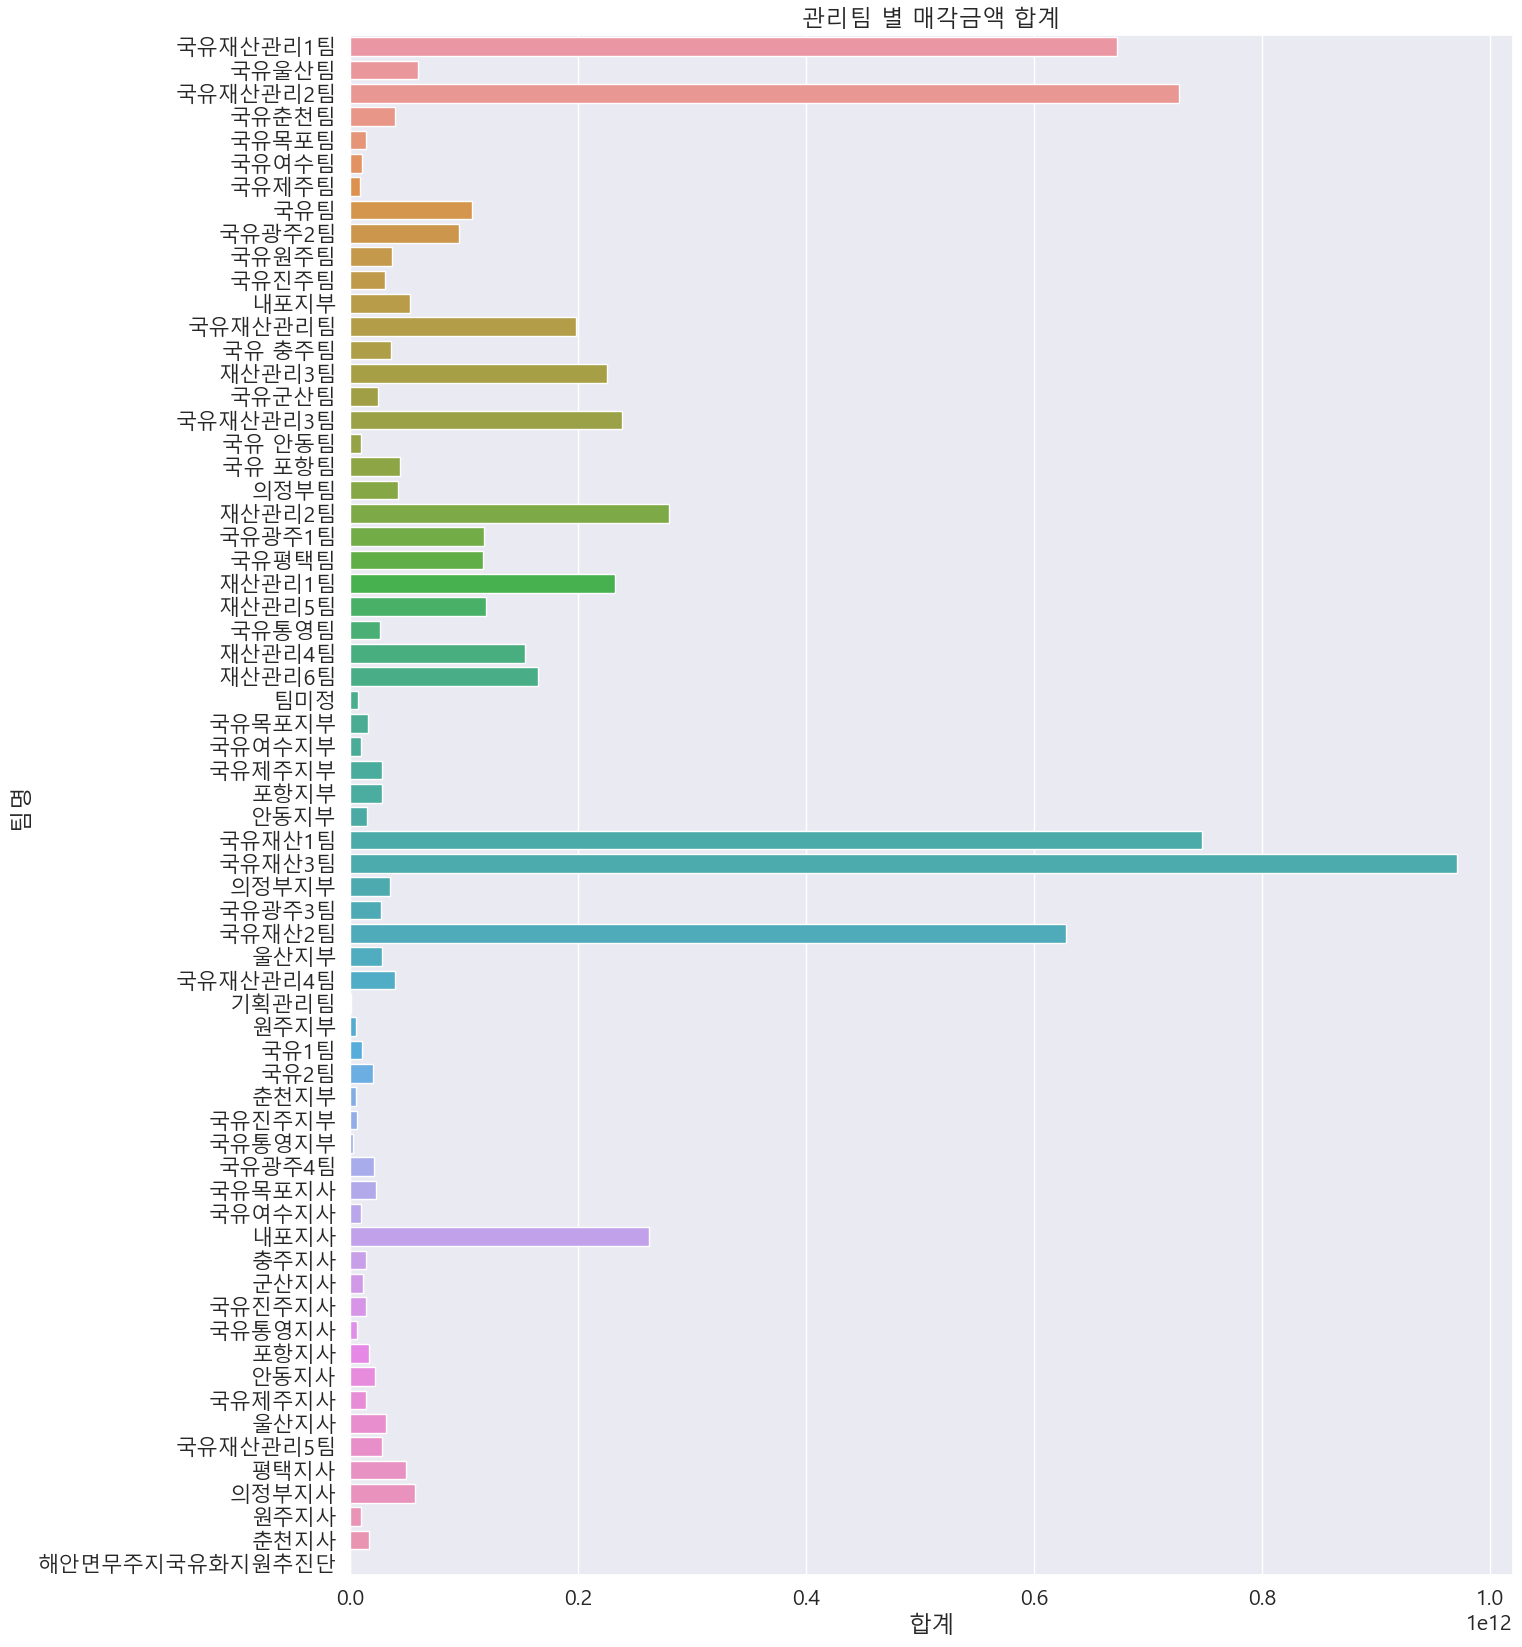

In [329]:
plt.figure(figsize=(15,20))
plt.title('관리팀 별 매각금액 합계')

sns.barplot('합계', '팀명', data = df_sum)
plt.savefig('C:/Users/user/Desktop/lecfile/nov/221128/관리팀별매각금액합계.png', dpi = 300, bbox_inches = 'tight')

In [ ]:
# 매각금액이 가장 많은 팀은 국유재산3팀이다. 
# 위 그래프를 통해 다른 팀과 확연한 차이가 남을 알 수 있으므로 바로 다음으로 매각금액이 많은 국유재산1팀과 유의미한 차이가 있는지 확인

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


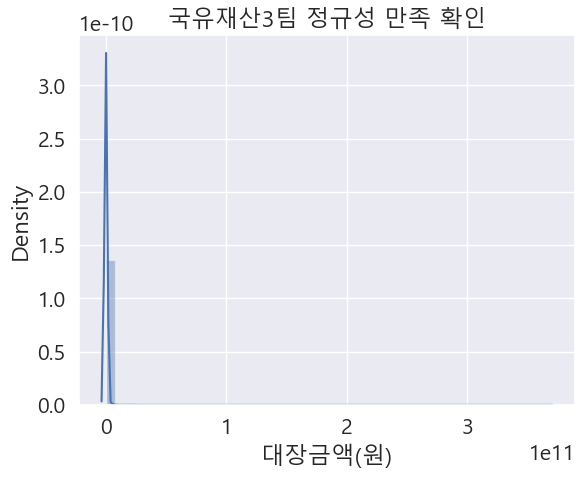

In [330]:
sns.distplot(df[df['팀명'] == '국유재산3팀']['대장금액(원)'])  
plt.title('국유재산3팀 정규성 만족 확인')
plt.savefig('C:/Users/user/Desktop/lecfile/nov/221128/국유재산3팀정규성만족확인.png', dpi = 300, bbox_inches = 'tight')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


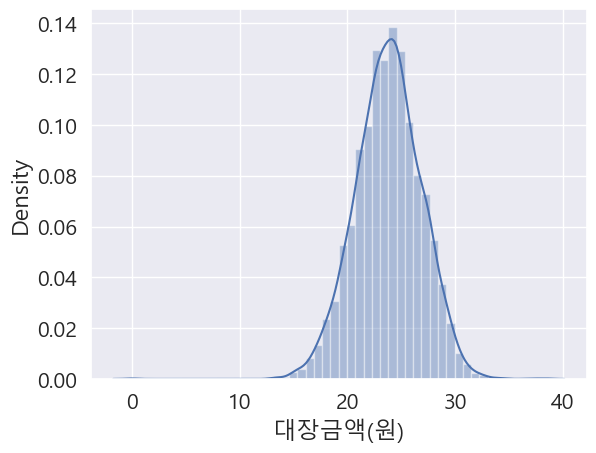

In [331]:
# 정규성을 만족하지 않으므로, 로그

sns.distplot(df[df['팀명'] == '국유재산3팀']['대장금액(원)'].apply(lambda x : math.log2(x+0.0001)))

plt.savefig('C:/Users/user/Desktop/lecfile/nov/221128/국유재산3팀정규화후dist.png', dpi = 300, bbox_inches = 'tight')

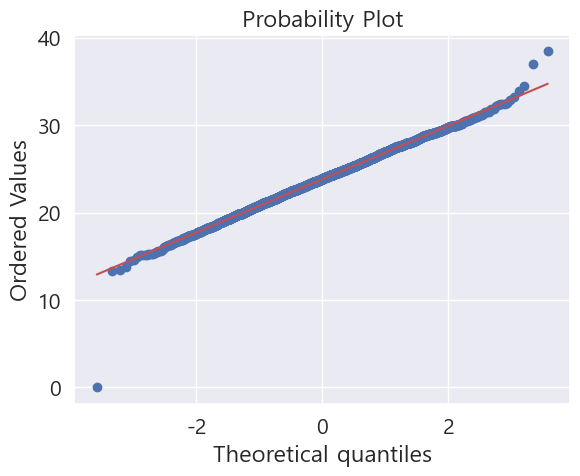

In [332]:
# 정규성을 거의 만족함을 알 수 있다.

stats.probplot(df[df['팀명'] == '국유재산3팀']['대장금액(원)'].apply(lambda x : math.log2(x+0.0001)), plot = plt)
plt.savefig('C:/Users/user/Desktop/lecfile/nov/221128/국유재산3팀정규화후qq.png', dpi = 300, bbox_inches = 'tight')

In [63]:
stats.shapiro(df[df['팀명'] == '국유재산3팀']['대장금액(원)'].apply(lambda x : math.log2(x+0.0001)))

ShapiroResult(statistic=0.9950197339057922, pvalue=1.532653032265685e-10)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


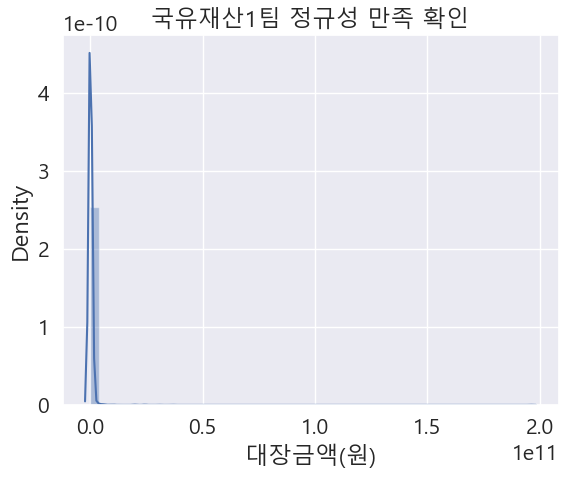

In [333]:
sns.distplot(df[df['팀명'] == '국유재산1팀']['대장금액(원)'])  
plt.title('국유재산1팀 정규성 만족 확인')
plt.savefig('C:/Users/user/Desktop/lecfile/nov/221128/국유재산1팀정규성만족확인.png', dpi = 300, bbox_inches = 'tight')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


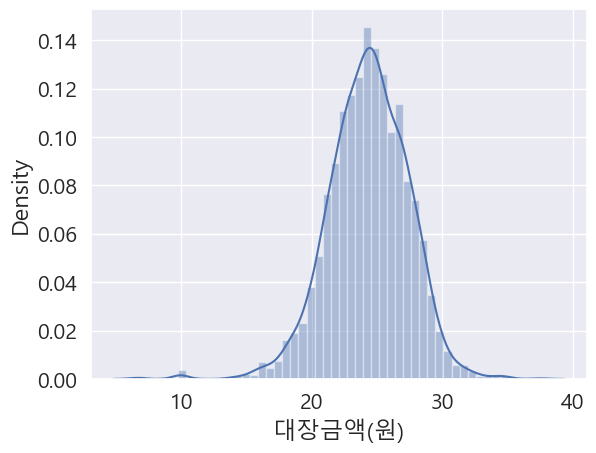

In [334]:
sns.distplot(df[df['팀명'] == '국유재산1팀']['대장금액(원)'].apply(lambda x : math.log2(x+0.0001)))
plt.savefig('C:/Users/user/Desktop/lecfile/nov/221128/국유재산1팀정규화후dist.png', dpi = 300, bbox_inches = 'tight')

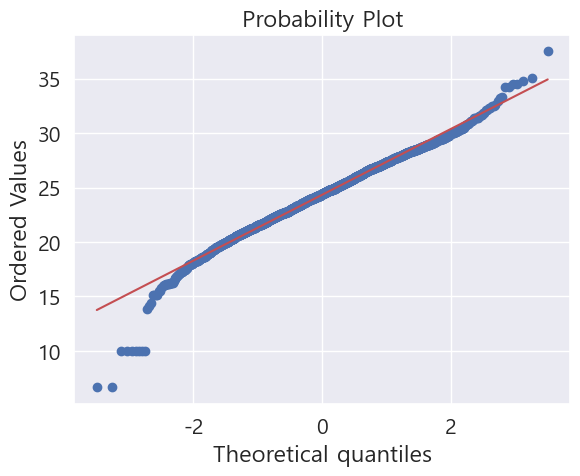

In [335]:
stats.probplot(df[df['팀명'] == '국유재산1팀']['대장금액(원)'].apply(lambda x : math.log2(x+0.0001)), plot = plt)
plt.savefig('C:/Users/user/Desktop/lecfile/nov/221128/국유재산1팀정규화후qq.png', dpi = 300, bbox_inches = 'tight')

In [66]:
stats.shapiro(df[df['팀명'] == '국유재산1팀']['대장금액(원)'].apply(lambda x : math.log2(x+0.0001)))

ShapiroResult(statistic=0.9843440055847168, pvalue=1.1026805601893265e-17)

In [69]:
m = [i in ['국유재산1팀','국유재산3팀'] for i in df['팀명']]

In [72]:
df_1 = df[m]

In [77]:
df_1['대장금액로그'] = df_1['대장금액(원)'].apply(lambda x : math.log2(x+0.0001))

C:\Users\user\AppData\Local\Temp\ipykernel_19964\2876605233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['대장금액로그'] = df_1['대장금액(원)'].apply(lambda x : math.log2(x+0.0001))


국유재산1팀 v.s. 국유재산3팀: Welch's t-test independent samples with Bonferroni correction, P_val=3.985e-13 stat=7.271e+00


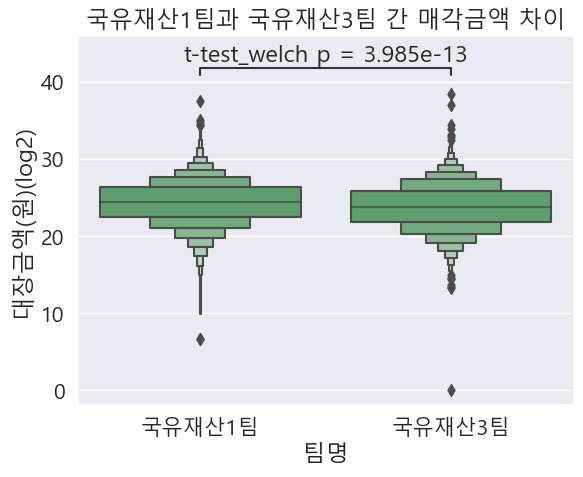

In [336]:
ax = plt.subplot()


ax = sns.boxenplot(x="팀명", y="대장금액로그",
              color="g",data=df_1)

plt.ylabel('대장금액(원)(log2)')

add_stat_annotation(ax, 
                    data = df_1,
                    x = '팀명' ,
                    y = '대장금액로그',
                    box_pairs = [('국유재산1팀','국유재산3팀')],
                    test = 't-test_welch', 
                    text_format = 'full', 
                    loc = 'inside',
                    verbose = 2)

plt.title('국유재산1팀과 국유재산3팀 간 매각금액 차이')
plt.savefig('C:/Users/user/Desktop/lecfile/nov/221128/국유재산1팀국유재산3팀간매각금액차이.png', dpi = 300, bbox_inches = 'tight')

In [ ]:
# 국유재산 1팀과 국유재산 3팀 간 p value 값은 3.985e-13으로 두 팀간에는 확연하게 유의미한 차이가 있음을 알 수 있다.
# 그러므로 국유재산 1팀은 나머지 하위 그룹과 유의한 차이를 보이고 있다는 것을 알 수 있다.

In [81]:
# 연도별 매각금액 추이를 확인한다.

In [83]:
df.head()

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명
0,2014,전라북도,전라북도 정읍시 상동 725,토지,전,56,9968000,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
1,2014,울산광역시,울산광역시 북구 천곡동 709-1,토지,임야,225,13770000,처분(매각수의),2014-01-01,국유재산관리부,국유울산팀
2,2014,전라북도,전라북도 정읍시 산내면 종성리 727-21,토지,답,105,1075200,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
3,2014,전라북도,전라북도 정읍시 산내면 종성리 727-16,토지,답,184,1884160,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
4,2014,전라북도,전라북도 김제시 검산동 424-3,토지,전,2106,23797800,처분(매각수의),2014-01-01,전북지역본부,국유재산관리2팀


In [84]:
df['연도구분'].unique()

array([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021], dtype=int64)

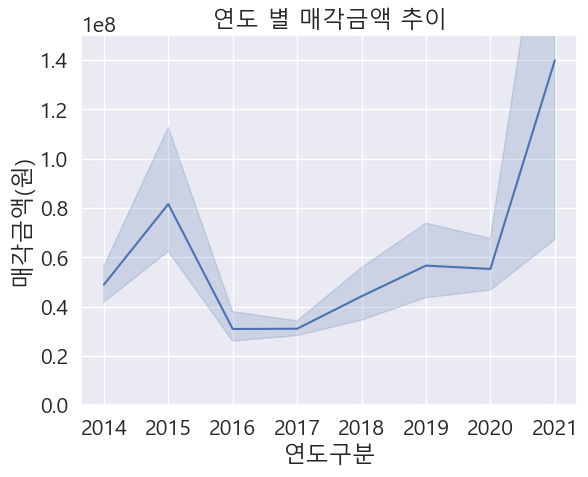

In [337]:

sns.lineplot(x="연도구분", y="대장금액(원)",
             data=df)
plt.ylabel('매각금액(원)')
plt.ylim(0, 150000000)

tick_val = [2014,2015,2016,2017,2018,2019,2020,2021]

plt.xticks(tick_val)


plt.title('연도 별 매각금액 추이')
plt.savefig('C:/Users/user/Desktop/lecfile/nov/221128/연도별매각금액추이.png', dpi = 300, bbox_inches = 'tight')

In [ ]:
# 연도별 매각금액 추이를 확인해 보니 다른 연도들에 비해 2021년의 값이 매우 크고, 유의수준 범위도 매우 넓게 나오고 있다.
# 유의수준을 줄여보는 작업을 시도한다.

In [100]:
df[df['연도구분'] == 2021]['대장금액(원)']

116627    235080000
116628      5105160
116629      5346759
116630    122614000
116631     73724200
            ...    
127184      3051840
127185      2384250
127186       488811
127187       189540
127188        73620
Name: 대장금액(원), Length: 10562, dtype: int64

In [110]:
m = [False if i == 0 else True for i in df['대장금액(원)']]

df_2 = df[m]

In [111]:
df_2

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명
0,2014,전라북도,전라북도 정읍시 상동 725,토지,전,56,9968000,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
1,2014,울산광역시,울산광역시 북구 천곡동 709-1,토지,임야,225,13770000,처분(매각수의),2014-01-01,국유재산관리부,국유울산팀
2,2014,전라북도,전라북도 정읍시 산내면 종성리 727-21,토지,답,105,1075200,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
3,2014,전라북도,전라북도 정읍시 산내면 종성리 727-16,토지,답,184,1884160,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
4,2014,전라북도,전라북도 김제시 검산동 424-3,토지,전,2106,23797800,처분(매각수의),2014-01-01,전북지역본부,국유재산관리2팀
...,...,...,...,...,...,...,...,...,...,...,...
127184,2021,강원도,강원도 홍천군 홍천읍 연봉리 408-112,토지,대,18,3051840,처분(매각수의),2021-12-22,강원지역본부,원주지사
127185,2021,강원도,강원도 홍천군 홍천읍 연봉리 408-113,토지,도로,43,2384250,처분(매각수의),2021-12-22,강원지역본부,원주지사
127186,2021,경기도,경기도 파주시 파평면 눌노리 144-6,토지,잡종지,24,488811,처분(매각수의),2021-12-23,인천지역본부,국유재산3팀
127187,2021,부산광역시,부산광역시 영도구 청학동 73-129,토지,임야,1053,189540,처분(매각수의),2021-12-28,부산지역본부,국유재산관리4팀


In [120]:
df2_1 = df_2[df_2['연도구분'] == 2021]['대장금액(원)']

In [125]:
m = [False if i < 10000 else True for i in df['대장금액(원)']]

df_2 = df[m]

<AxesSubplot:xlabel='연도구분', ylabel='대장금액(원)'>

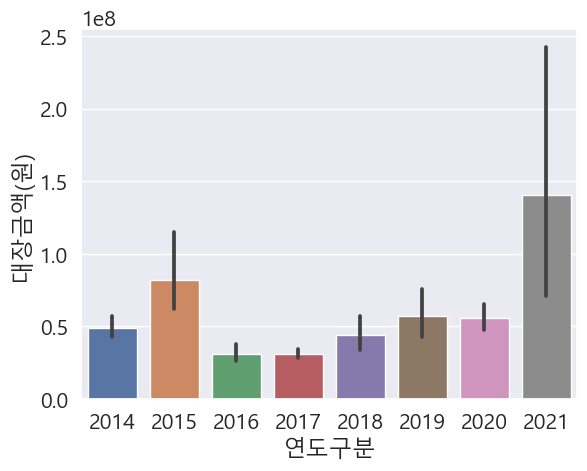

In [127]:
sns.barplot(x="연도구분", y="대장금액(원)",
             data=df_2)

In [134]:
df_2[df_2['대장금액(원)']>1500000000][df_2['연도구분'] == 2021]

C:\Users\user\AppData\Local\Temp\ipykernel_19964\2939995224.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2[df_2['대장금액(원)']>1500000000][df_2['연도구분'] == 2021]


,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명
117126,2021,광주광역시,광주광역시 남구 주월동 1156-4,토지,대,5052,2177412000,처분(매각수의),2016-06-30,광주전남지역본부,국유광주3팀
117718,2021,인천광역시,인천광역시 강화군 길상면 초지리 1329,토지,잡종지,10743,2846895000,처분(사용승인),2021-10-13,인천지역본부,국유재산3팀
118212,2021,경기도,경기도 김포시 고촌읍 향산리 462-10,토지,전,3243,2302530000,처분(매각수의),2020-12-11,인천지역본부,국유재산1팀
118238,2021,경기도,경기도 김포시 고촌읍 향산리 586-46,토지,전,6850,5324505000,처분(매각수의),2020-12-11,인천지역본부,국유재산1팀
118239,2021,경기도,경기도 김포시 고촌읍 향산리 586-47,토지,전,6208,4632409600,처분(매각수의),2020-12-11,인천지역본부,국유재산1팀
118250,2021,경기도,경기도 김포시 고촌읍 향산리 588-76,토지,전,3078,2237090400,처분(매각수의),2020-12-11,인천지역본부,국유재산1팀
118255,2021,경기도,경기도 김포시 고촌읍 향산리 588-3,토지,전,5229,3460029300,처분(매각수의),2020-12-11,인천지역본부,국유재산1팀
118257,2021,경기도,경기도 김포시 고촌읍 향산리 588-45,토지,전,3881,1533771200,처분(매각수의),2020-12-11,인천지역본부,국유재산1팀
118423,2021,서울특별시,서울특별시 송파구 잠실동 10,토지,체육용지,80627,367000000000,처분(매각수의),2021-07-01,서울동부지역본부,국유재산3팀
118543,2021,서울특별시,서울특별시 성북구 정릉동 966-125,토지,대,397,2000483000,처분(매각수의),2021-02-04,서울동부지역본부,국유재산2팀


In [135]:
# 실패.
# 유의수준이 높게 나오는 이유는 매각금액이 1390억, 1960억과 같이 높은 것들이 일부 확인되고 있기 때문인 것 같다.

In [136]:
#상위 5개 지역별 매각면적을 확인한다.

In [137]:
df.head()

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명
0,2014,전라북도,전라북도 정읍시 상동 725,토지,전,56,9968000,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
1,2014,울산광역시,울산광역시 북구 천곡동 709-1,토지,임야,225,13770000,처분(매각수의),2014-01-01,국유재산관리부,국유울산팀
2,2014,전라북도,전라북도 정읍시 산내면 종성리 727-21,토지,답,105,1075200,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
3,2014,전라북도,전라북도 정읍시 산내면 종성리 727-16,토지,답,184,1884160,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
4,2014,전라북도,전라북도 김제시 검산동 424-3,토지,전,2106,23797800,처분(매각수의),2014-01-01,전북지역본부,국유재산관리2팀


In [139]:
df['지역구분'].unique()

array(['전라북도', '울산광역시', '부산광역시', '강원도', '경상북도', '전라남도', '제주특별자치도', '충청남도',
       '경상남도', '대전광역시', '충청북도', '인천광역시', '세종특별자치시', '경기도', '대구광역시',
       '서울특별시', '광주광역시'], dtype=object)

In [142]:
m = [False if i == 0 else True for i in df['대장면적(제곱미터)']]
df_3 = df[m]

In [143]:
df_3

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명
0,2014,전라북도,전라북도 정읍시 상동 725,토지,전,56,9968000,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
1,2014,울산광역시,울산광역시 북구 천곡동 709-1,토지,임야,225,13770000,처분(매각수의),2014-01-01,국유재산관리부,국유울산팀
2,2014,전라북도,전라북도 정읍시 산내면 종성리 727-21,토지,답,105,1075200,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
3,2014,전라북도,전라북도 정읍시 산내면 종성리 727-16,토지,답,184,1884160,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
4,2014,전라북도,전라북도 김제시 검산동 424-3,토지,전,2106,23797800,처분(매각수의),2014-01-01,전북지역본부,국유재산관리2팀
...,...,...,...,...,...,...,...,...,...,...,...
127184,2021,강원도,강원도 홍천군 홍천읍 연봉리 408-112,토지,대,18,3051840,처분(매각수의),2021-12-22,강원지역본부,원주지사
127185,2021,강원도,강원도 홍천군 홍천읍 연봉리 408-113,토지,도로,43,2384250,처분(매각수의),2021-12-22,강원지역본부,원주지사
127186,2021,경기도,경기도 파주시 파평면 눌노리 144-6,토지,잡종지,24,488811,처분(매각수의),2021-12-23,인천지역본부,국유재산3팀
127187,2021,부산광역시,부산광역시 영도구 청학동 73-129,토지,임야,1053,189540,처분(매각수의),2021-12-28,부산지역본부,국유재산관리4팀


<AxesSubplot:xlabel='대장면적(제곱미터)', ylabel='지역구분'>

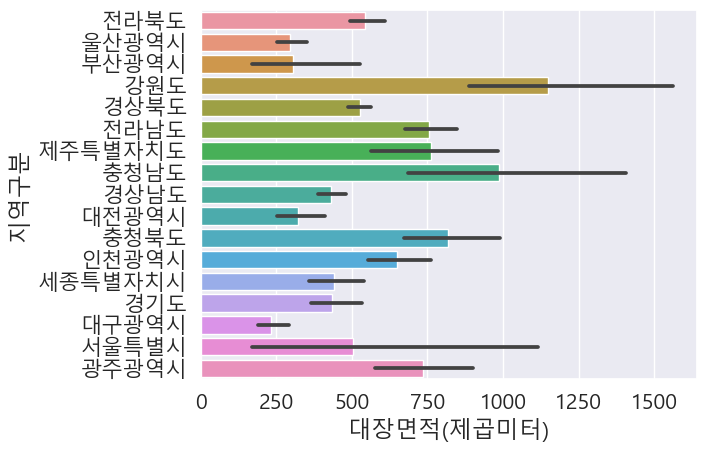

In [148]:
sns.barplot(x='대장면적(제곱미터)', y="지역구분",
             data=df_3)

In [149]:
df_3 = df_3.reset_index(drop=True)

In [159]:
li_sum2 = []

for i in df_3['지역구분'].unique():
    li_sum2.append(df_3[df_3['지역구분'] == i]['대장면적(제곱미터)'].sum())

In [160]:
li_sum2

[6501851,
 736384,
 2767956,
 12873910,
 6709263,
 9090624,
 1000689,
 8023451,
 5783023,
 361256,
 5024722,
 1636284,
 274256,
 10384133,
 602050,
 2948849,
 1327784]

In [161]:
df_sum2 = pd.DataFrame()

In [162]:
df_sum2['지역구분'] = df_3['지역구분'].unique()

In [163]:
df_sum2['면적합계'] = li_sum2

In [164]:
df_sum2

,지역구분,면적합계
0,전라북도,6501851
1,울산광역시,736384
2,부산광역시,2767956
3,강원도,12873910
4,경상북도,6709263
5,전라남도,9090624
6,제주특별자치도,1000689
7,충청남도,8023451
8,경상남도,5783023
9,대전광역시,361256


In [169]:
df_sum2 = df_sum2.sort_values(by='면적합계', ascending=False)

In [189]:
df_sum2 = df_sum2.reset_index(drop=True)

In [191]:
df_sum2.loc[0][1]

12873910

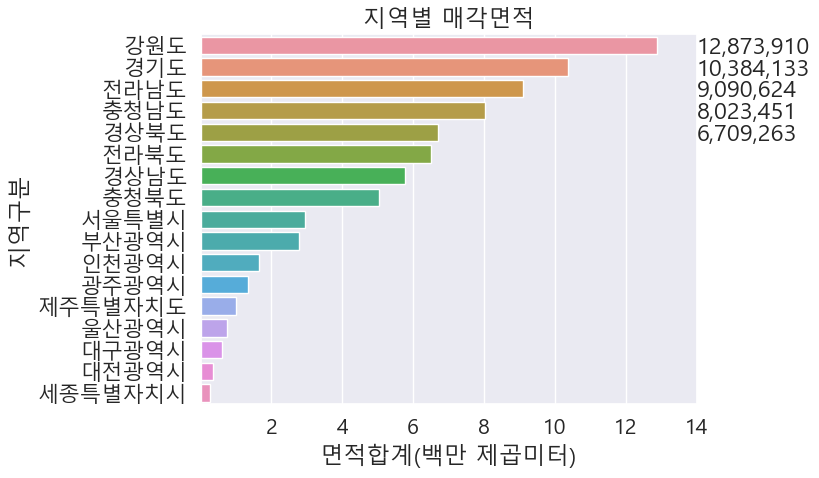

In [328]:
sns.barplot(x='면적합계', y="지역구분",
             data=df_sum2)

tick_val = [2000000, 4000000, 6000000, 8000000, 10000000, 12000000, 14000000]
tick_lab = [2, 4, 6, 8, 10, 12, 14]

plt.xticks(tick_val, tick_lab)
plt.title('지역별 매각면적')
plt.xlabel('면적합계(백만 제곱미터)')

for i in range(5):
    plt.text(14000000, i+0.35, format(df_sum2.loc[i][1], ','))

    
plt.savefig('C:/Users/user/Desktop/lecfile/nov/221128/지역별매각면적.png', dpi = 300, bbox_inches = 'tight')

In [ ]:
# 상위 5개 지역별 매각면적의 정확한 확인을 위해 전체 면적 합계를 구했음.

In [199]:
#계약일자 정보를 토대로 매각이 많은 때의 특징을 알아본다.

In [200]:
df.head()

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명
0,2014,전라북도,전라북도 정읍시 상동 725,토지,전,56,9968000,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
1,2014,울산광역시,울산광역시 북구 천곡동 709-1,토지,임야,225,13770000,처분(매각수의),2014-01-01,국유재산관리부,국유울산팀
2,2014,전라북도,전라북도 정읍시 산내면 종성리 727-21,토지,답,105,1075200,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
3,2014,전라북도,전라북도 정읍시 산내면 종성리 727-16,토지,답,184,1884160,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
4,2014,전라북도,전라북도 김제시 검산동 424-3,토지,전,2106,23797800,처분(매각수의),2014-01-01,전북지역본부,국유재산관리2팀


In [204]:
# 보통 국가의 매각이라면 분기별 차이가 뚜렷이 나타나지 않을까? 분기별 차이를 알아보도록 한다.
# 일반적으로 4분기에 가장 많은 일이 일어나므로, 4분기가 다른 분기와는 차이가 날 것이다.

In [208]:
int(df['계약일자'][0].split('-')[1])

1

In [271]:
def qu(x):
    x = int(x.split('-')[1])
    
    if 1<=x<=3:
        return 1
    if 4<=x<=6:
        return 2
    if 7<=x<=9:
        return 3
    if 10<=x<=12:
        return 4
    


df['분기'] = df['계약일자'].apply(lambda x : qu(x))

In [212]:
df.head()

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명,분기
0,2014,전라북도,전라북도 정읍시 상동 725,토지,전,56,9968000,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀,1
1,2014,울산광역시,울산광역시 북구 천곡동 709-1,토지,임야,225,13770000,처분(매각수의),2014-01-01,국유재산관리부,국유울산팀,1
2,2014,전라북도,전라북도 정읍시 산내면 종성리 727-21,토지,답,105,1075200,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀,1
3,2014,전라북도,전라북도 정읍시 산내면 종성리 727-16,토지,답,184,1884160,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀,1
4,2014,전라북도,전라북도 김제시 검산동 424-3,토지,전,2106,23797800,처분(매각수의),2014-01-01,전북지역본부,국유재산관리2팀,1


<AxesSubplot:xlabel='분기', ylabel='대장금액(원)'>

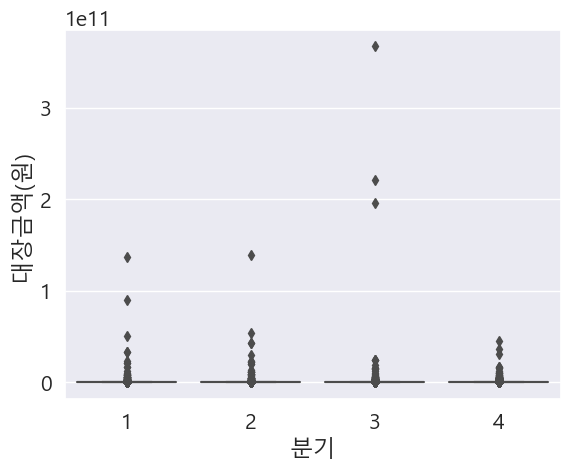

In [214]:
sns.boxplot(x='분기', y="대장금액(원)", data=df)

In [216]:
df['대장금액로그'] = df['대장금액(원)'].apply(lambda x : math.log2(x+0.0001))

<AxesSubplot:xlabel='분기', ylabel='대장금액로그'>

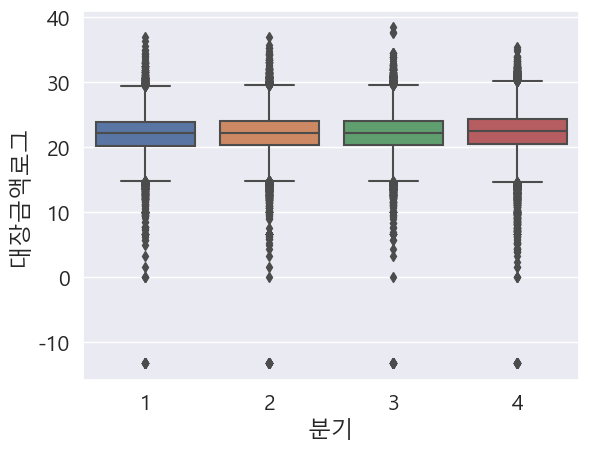

In [217]:
sns.boxplot(x='분기', y="대장금액로그", data=df)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1 v.s. 2: Welch's t-test independent samples with Bonferroni correction, P_val=8.130e-02 stat=-2.469e+00
2 v.s. 3: Welch's t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-1.157e+00
3 v.s. 4: Welch's t-test independent samples with Bonferroni correction, P_val=7.181e-13 stat=-7.419e+00
1 v.s. 3: Welch's t-test independent samples with Bonferroni correction, P_val=2.925e-03 stat=-3.488e+00
2 v.s. 4: Welch's t-test independent samples with Bonferroni correction, P_val=6.824e-18 stat=-8.823e+00
1 v.s. 4: Welch's t-test independent samples with Bonferroni correction, P_val=2.497e-26 stat=-1.079e+01


(<AxesSubplot:xlabel='분기', ylabel='대장금액(원)(log2)'>,
  <statannot.StatResult.StatResult at 0x171a2d3bf40>])

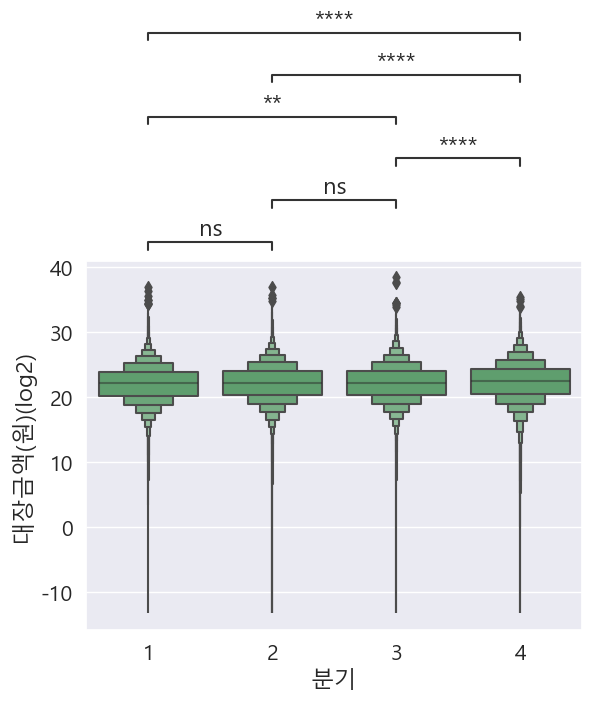

In [219]:
ax = plt.subplot()


ax = sns.boxenplot(x="분기", y="대장금액로그",
              color="g",data=df)

plt.ylabel('대장금액(원)(log2)')

add_stat_annotation(ax, 
                    data = df,
                    x = '분기' ,
                    y = '대장금액로그',
                    box_pairs = [(1,2),
                                (1,3),
                                (1,4),
                                (2,3),
                                (2,4),
                                (3,4)],
                    test = 't-test_welch', 
                    text_format = 'star', 
                    loc = 'outside',
                    verbose = 2)

In [221]:
m = [False if i == 0 else True for i in df['대장금액(원)']]
df_x = df[m]

1 v.s. 2: Welch's t-test independent samples with Bonferroni correction, P_val=2.102e-02 stat=-2.920e+00
2 v.s. 3: Welch's t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-1.106e+00
3 v.s. 4: Welch's t-test independent samples with Bonferroni correction, P_val=2.560e-13 stat=-7.554e+00
1 v.s. 3: Welch's t-test independent samples with Bonferroni correction, P_val=6.776e-04 stat=-3.861e+00
2 v.s. 4: Welch's t-test independent samples with Bonferroni correction, P_val=2.885e-18 stat=-8.919e+00
1 v.s. 4: Welch's t-test independent samples with Bonferroni correction, P_val=1.931e-28 stat=-1.123e+01


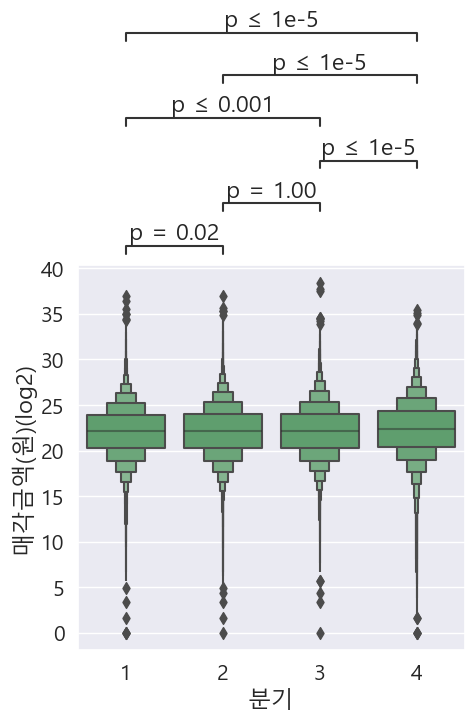

In [358]:
plt.figure(figsize = (5,5))

ax = plt.subplot()
ax = sns.boxenplot(x="분기", y="대장금액로그",
              color="g",data=df_x)

plt.ylabel('매각금액(원)(log2)')


add_stat_annotation(ax, 
                    data = df_x,
                    x = '분기' ,
                    y = '대장금액로그',
                    box_pairs = [(1,2),
                                (1,3),
                                (1,4),
                                (2,3),
                                (2,4),
                                (3,4)],
                    test = 't-test_welch', 
                    text_format = 'simple', 
                    loc = 'outside',
                    verbose = 2)

plt.savefig('C:/Users/user/Desktop/lecfile/nov/221128/분기별매각금액.png', dpi = 300, bbox_inches = 'tight')

In [ ]:
# 4분기의 매각금액이 다른 분기들보다 높다.

# 그렇다면 단순하게 매각 자체가 많은 때를 연도별로 확인해보자.

In [237]:
df['연도구분'].value_counts(sort = False)

2014    17126
2015    17109
2016    18752
2017    22615
2018    13889
2019    13620
2020    13516
2021    10562
Name: 연도구분, dtype: int64

In [239]:
list(range(2014,2022))

[2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

In [240]:
df_ye = pd.DataFrame()

In [241]:
df_ye['연도'] = list(range(2014,2022))

In [242]:
df_ye['매각횟수'] = list(df['연도구분'].value_counts(sort = False))

In [243]:
df_ye

,연도,매각횟수
0,2014,17126
1,2015,17109
2,2016,18752
3,2017,22615
4,2018,13889
5,2019,13620
6,2020,13516
7,2021,10562


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


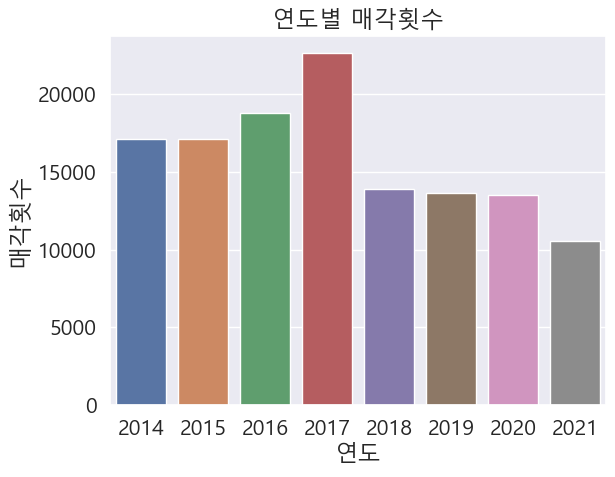

In [327]:
sns.barplot(df_ye['연도'], df_ye['매각횟수'])
plt.title('연도별 매각횟수')
plt.savefig('C:/Users/user/Desktop/lecfile/nov/221128/연도별매각횟수.png', dpi = 300, bbox_inches = 'tight')

In [264]:
# 매각 횟수가 가장 많았던 해는 2017년이었음을 알 수 있다.

In [265]:
# 또, 월별로 초순, 중순, 말 경에 각각 차이가 날 수도 있다.

In [268]:
df_x['계약일자'][0].split('-')[2]

'01'

In [272]:
def month3(x):
    x = int(x.split('-')[2])
    
    if 1<=x<=10:
        return '초순'
    if 11<=x<=20:
        return '중순'
    if 21<=x<=31:
        return '말'

    


df_x['초중말'] = df_x['계약일자'].apply(lambda x : month3(x))

C:\Users\user\AppData\Local\Temp\ipykernel_19964\4064961925.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x['초중말'] = df_x['계약일자'].apply(lambda x : month3(x))


In [273]:
df_x

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명,분기,대장금액로그,초중말
0,2014,전라북도,전라북도 정읍시 상동 725,토지,전,56,9968000,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀,1,23.248873,초순
1,2014,울산광역시,울산광역시 북구 천곡동 709-1,토지,임야,225,13770000,처분(매각수의),2014-01-01,국유재산관리부,국유울산팀,1,23.715025,초순
2,2014,전라북도,전라북도 정읍시 산내면 종성리 727-21,토지,답,105,1075200,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀,1,20.036174,초순
3,2014,전라북도,전라북도 정읍시 산내면 종성리 727-16,토지,답,184,1884160,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀,1,20.845490,초순
4,2014,전라북도,전라북도 김제시 검산동 424-3,토지,전,2106,23797800,처분(매각수의),2014-01-01,전북지역본부,국유재산관리2팀,1,24.504325,초순
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127184,2021,강원도,강원도 홍천군 홍천읍 연봉리 408-112,토지,대,18,3051840,처분(매각수의),2021-12-22,강원지역본부,원주지사,4,21.541248,말
127185,2021,강원도,강원도 홍천군 홍천읍 연봉리 408-113,토지,도로,43,2384250,처분(매각수의),2021-12-22,강원지역본부,원주지사,4,21.185104,말
127186,2021,경기도,경기도 파주시 파평면 눌노리 144-6,토지,잡종지,24,488811,처분(매각수의),2021-12-23,인천지역본부,국유재산3팀,4,18.898917,말
127187,2021,부산광역시,부산광역시 영도구 청학동 73-129,토지,임야,1053,189540,처분(매각수의),2021-12-28,부산지역본부,국유재산관리4팀,4,17.532143,말


In [277]:
list(df_x['초중말'].value_counts(sort = False))

[37397, 40194, 49536]

In [278]:
df_cho = pd.DataFrame()

In [284]:
df_cho['월중'] = ['초순(1~10일)','중순(11~20일)','말(21~31일)']

In [285]:
df_cho['매각횟수'] = list(df_x['초중말'].value_counts(sort = False))

In [286]:
df_cho

,월중,매각횟수
0,초순(1~10일),37397
1,중순(11~20일),40194
2,말(21~31일),49536


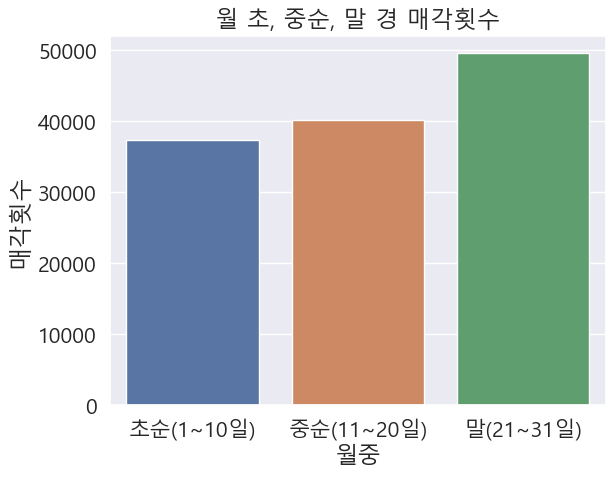

In [339]:
sns.barplot(x = '월중', y = '매각횟수', data = df_cho)

plt.title('월 초, 중순, 말 경 매각횟수')
plt.savefig('C:/Users/user/Desktop/lecfile/nov/221128/초중말매각횟수.png', dpi = 300, bbox_inches = 'tight')

In [ ]:
# 월 중에는 초순과 중순보다는 말경에 매각이 더 많이 일어났음을 알 수 있다.